# Understand the Data

In [1]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import squarify
import plotly.express as px  
import plotly.graph_objects as go  
import warnings
warnings.filterwarnings('ignore')


In [2]:
source = r'C:\Users\Rudra\Downloads\Python_Pandas_profiling\Marvel vs DC\Marvel Vs DC NEW.csv '
df = pd.read_csv("Marvel Vs DC NEW.csv" ,  encoding= 'unicode_escape') 
df.sample(7)

,ID,Movie,Year,Genre,RunTime,Description,IMDB_Score
428,428,Teen Titans,(2003â2006),"Animation,Action,Adventure",23 min,A team of five teenaged superheroes save the w...,7.9
1220,1220,Young Justice,(2010â ),"Animation,Action,Adventure",22 min,"When the cave is attacked, can Artemis and Rob...",9.0
1515,1515,Watchmen,-2019,"Action,Drama,Mystery",61 min,Angela investigates the attempted murder of a ...,8.0
755,755,The Batman,(2004â2008),"Animation,Action,Adventure",19 min,"A supervillain who calls himself ""Firefly"" is ...",7.2
627,627,Batman Beyond,(1999â2001),"Animation,Action,Adventure",22 min,Determined to bring his father's murderers to ...,8.4
42,42,Fantastic 4: Rise of the Silver Surfer,-2007,"Action,Adventure,Fantasy",92 min,The Fantastic Four learn that they aren't the ...,5.6
1357,1357,Supergirl,(2015â2021),"Action,Adventure,Drama",43 min,A standoff ensues between the DEO and Astra's ...,7.7


In [3]:
df.size

11830

In [4]:
df.shape

(1690, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690 entries, 0 to 1689
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           1690 non-null   int64  
 1   Movie        1690 non-null   object 
 2   Year         1657 non-null   object 
 3   Genre        1683 non-null   object 
 4   RunTime      1690 non-null   object 
 5   Description  1690 non-null   object 
 6   IMDB_Score   1690 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 92.5+ KB


In [6]:
df.describe(include='all')

,ID,Movie,Year,Genre,RunTime,Description,IMDB_Score
count,1690.000000,1690,1657,1683,1690,1690,1690.000000
unique,NaN,314,147,90,126,1571,NaN
top,NaN,Smallville,(2001â2011),"Animation,Action,Adventure",0,a Plot,NaN
freq,NaN,176,176,439,283,117,NaN
mean,844.500000,NaN,NaN,NaN,NaN,NaN,6.877337
std,488.005294,NaN,NaN,NaN,NaN,NaN,2.690564
min,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,422.250000,NaN,NaN,NaN,NaN,NaN,6.900000
50%,844.500000,NaN,NaN,NaN,NaN,NaN,7.800000
75%,1266.750000,NaN,NaN,NaN,NaN,NaN,8.400000


In [7]:
df.columns

Index(['ID', 'Movie', 'Year', 'Genre', 'RunTime', 'Description', 'IMDB_Score'], dtype='object')

# Data Cleaning 
- Create Two separate column for the StartYear, End Year from year column
- Find the Run Time in min 

<AxesSubplot: >

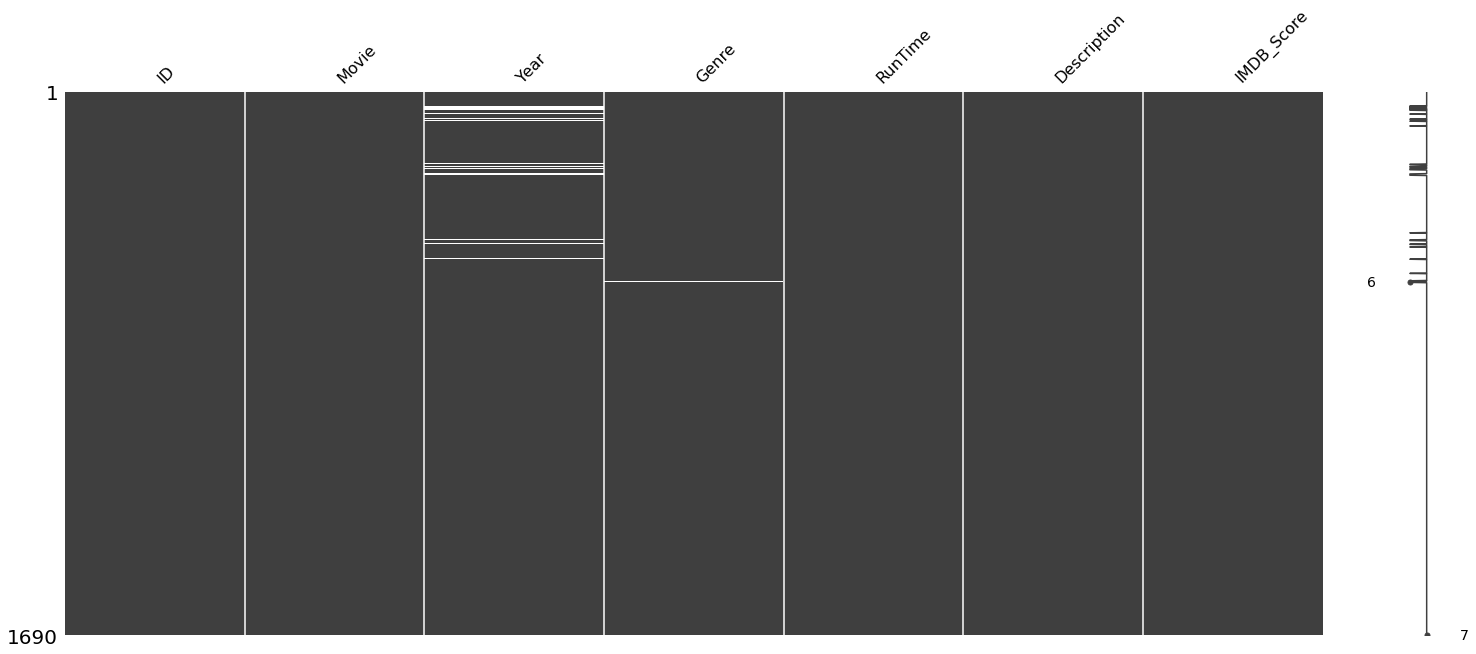

In [8]:
msno.matrix(df)

In [9]:
df.iloc[866]

ID                                                           866
Movie                                   Justice League Unlimited
Year                                               (2004â2006)
Genre                                 Animation,Action,Adventure
RunTime                                                   23 min
Description    When Circe changes Wonder Woman into a pig, Ba...
IMDB_Score                                                   7.8
Name: 866, dtype: object

In [10]:
type('RunTime')

str

In [11]:
df['RunTime'].sample(7)

1481    21 min
1208         0
1000    22 min
1565         0
464     75 min
520          0
1637    42 min
Name: RunTime, dtype: object

In [12]:
df['RunTime(Min)'] = df['RunTime'].str.split(expand=True)[0]
df['RunTime(Min)'].sample(9)

493     92
553      4
652     22
757     21
1173    42
1283    22
1357    43
907     44
981     24
Name: RunTime(Min), dtype: object

In [13]:
df['Year'].sample(17)

1036        (2004â2008)
390                 -2021
1483           (2010â )
1044           (2019â )
699         (1992â1995)
70           (2006 Video)
1539        (2015â2021)
1407        (2015â2018)
239                   NaN
81      (2017 TV Special)
832         (2004â2006)
1215           (2010â )
1586           (2016â )
1433        (2015â2021)
190            (2021â )
404                 -2013
313         (2013â2020)
Name: Year, dtype: object

In [14]:
# Extract starting and ending years using regex
df[['StartYear', 'EndYear']] = df['Year'].str.extract(r'(\d{4})[^\d]*(\d{4}| )')

# Clean up EndYear to handle cases with ' ' (no ending year)
df['EndYear'] = df['EndYear'].replace(' ', 'No End Year')

# Display the updated DataFrame
print(df[['Year', 'StartYear', 'EndYear']])

               Year StartYear      EndYear
0             -2021       NaN          NaN
1        (2021â )      2021  No End Year
2             -2021       NaN          NaN
3             -2021       NaN          NaN
4             -2021       NaN          NaN
...             ...       ...          ...
1685     (2016â )      2016  No End Year
1686  (2015â2021)      2015         2021
1687  (2015â2021)      2015         2021
1688  (2015â2021)      2015         2021
1689  (2015â2021)      2015         2021

[1690 rows x 3 columns]


In [15]:
df[['Year', 'StartYear', 'EndYear']].sample(8)


,Year,StartYear,EndYear
160,(2001â2004),2001,2004
1288,(2014â2015),2014,2015
305,(2017â2019),2017,2019
1578,(2014â ),2014,No End Year
210,(2021â ),2021,No End Year
1012,(2004â2008),2004,2008
278,(2013â2020),2013,2020
113,(2001â2004),2001,2004


In [16]:
df.columns

Index(['ID', 'Movie', 'Year', 'Genre', 'RunTime', 'Description', 'IMDB_Score',
       'RunTime(Min)', 'StartYear', 'EndYear'],
      dtype='object')

In [17]:
df.drop(columns={"Year","RunTime", "Description"}, inplace=True)

In [18]:
df.duplicated().sum()

0

In [19]:
df.isnull().sum()

ID                0
Movie             0
Genre             7
IMDB_Score        0
RunTime(Min)      0
StartYear       180
EndYear         180
dtype: int64

# Analysis

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690 entries, 0 to 1689
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            1690 non-null   int64  
 1   Movie         1690 non-null   object 
 2   Genre         1683 non-null   object 
 3   IMDB_Score    1690 non-null   float64
 4   RunTime(Min)  1690 non-null   object 
 5   StartYear     1510 non-null   object 
 6   EndYear       1510 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 92.5+ KB


In [21]:
df['Genre'].sample(8)

256        Action,Adventure,Drama
333        Action,Adventure,Drama
602    Animation,Action,Adventure
255        Action,Adventure,Drama
369        Action,Adventure,Drama
347        Action,Adventure,Drama
953       Adventure,Drama,Romance
956       Adventure,Drama,Romance
Name: Genre, dtype: object

In [22]:
df['Movie'].unique()

array(['Eternals', 'Loki', 'The Falcon and the Winter Soldier',
       'WandaVision', 'Spider-Man: No Way Home', 'Black Widow',
       'Avengers: Endgame', 'Guardians of the Galaxy',
       'Thor: Love and Thunder', 'Spider-Man: Far from Home',
       'Thor: Ragnarok', 'Avengers: Infinity War', 'Black Panther',
       'Captain Marvel', 'Shang-Chi and the Legend of the Ten Rings',
       'Spider-Man: Homecoming', 'Avengers: Age of Ultron',
       'Captain America: The First Avenger',
       'Guardians of the Galaxy Vol. 2', 'Thor', 'Iron Man',
       'Captain America: Civil War', 'The Avengers',
       'Doctor Strange in the Multiverse of Madness', 'Brightburn',
       'Doctor Strange', 'Ant-Man', 'Captain America: The Winter Soldier',
       'Iron Man 3', 'What If...?', 'Black Panther: Wakanda Forever',
       'Thor: The Dark World', 'Iron Man 2', 'Spider-Man 3',
       'Ant-Man and the Wasp', 'The Incredible Hulk', 'Hawkeye',
       'Guardians of the Galaxy Vol. 3', 'The Marvels', 'Mo

### Find out the keywords and categories  

In [23]:
marvel_most_frequent_keywords = [
    "Iron Man", "Tony Stark", "Captain America", "Steve Rogers", "Thor", "Hulk", 
    "Bruce Banner", "Spider-Man", "Peter Parker", "Black Widow", "Natasha Romanoff", 
    "Doctor Strange", "Stephen Strange", "Black Panther", "T'Challa", "Ant-Man", 
    "Scott Lang", "Captain Marvel", "Carol Danvers", "Hawkeye", "Clint Barton", 
    "Scarlet Witch", "Wanda Maximoff", "Vision", "Loki", "Thanos", "Nick Fury", 
    "Star-Lord", "Peter Quill", "Gamora", "Rocket Raccoon", "Groot", "Deadpool", 
    "Wolverine", "Logan", "Silver Surfer", "Daredevil", "Matt Murdock", "Winter Soldier", 
    "Bucky Barnes", "Avengers", "Hero", "Villain", "Superpower", "Infinity", "Asgard", 
    "Shield", "Superhero", "Power", "Universe", "Battle", "Origin", "War", "Quantum", 
    "Multiverse", "Technology", "Transformation", "Alliance", "Legacy", "Time", 
    "Space", "Justice", "Wakanda", "Stark", "Mutant", "S.H.I.E.L.D.", "Gem", "Crossover", 
    "Team", "God", "Cosmic", "Destiny", "Drax", "Jessica Jones", "Luke Cage", 
    "X-Men", "Fantastic Four", "Venom", "Ghost Rider", "The Punisher", "The Eternals", 
    "Blade", "Hank Pym", "Magneto"
]


In [24]:
dc_most_frequent_keywords = [
    "Batman", "Superman", "Justice", "League", "Dark", "Knight", "Wonder Woman", 
    "Suicide Squad", "Man of Steel", "Gotham", "Green Lantern", "Flash", "Arrow", 
    "Titans", "Shazam", "Aquaman", "Joker", "Birds of Prey", "Vengeance", "Crisis", 
    "Return", "Rise", "Legends", "Hero", "Dawn", "Tomorrow", "Gods", "Power", 
    "World", "Origin", "Reign", "Son", "War", "Throne", "Watchmen", "Phantom", 
    "Enemy", "Universe", "Blood", "Redemption", "Doomsday", "Apocalypse", "End", 
    "Constantine", "Catwoman", "Jonah Hex", "Nightwing", "Robin", "Supergirl", 
    "Zatanna", "Swamp Thing", "Blue Beetle", "Black Adam", "Vixen", "Harley Quinn", 
    "Static Shock", "Hawkman", "Green Arrow", "Batgirl", "Superboy", "Darkseid", 
    "Deathstroke", "Lobo", "Spectre", "The Question", "Red Hood", "Lucifer", 
    "Steel", "Raven", "Huntress", "Booster Gold", "Mr. Terrific", "Black Canary", 
    "The Atom", "Martian Manhunter", "Dr. Fate", "Black Lightning", "Firestorm", 
    "Etrigan", "The Demon", "Orion", "Metamorpho", "Azrael", "Deadshot", 
    "Solomon Grundy", "Doctor Manhattan"
]


In [25]:
def dc_or_Marvel (title):
    for keyword in marvel_most_frequent_keywords:
        if keyword in title:
            return 'Marvel'
    for keyword in dc_most_frequent_keywords:
        if keyword in title:
            return 'DC'
    return 'Unknown'   
df['dc/marvel'] =df['Movie'].apply(dc_or_Marvel)
df.sample(7)

,ID,Movie,Genre,IMDB_Score,RunTime(Min),StartYear,EndYear,dc/marvel
498,498,Challenge of the Superfriends,"Animation,Action,Family",7.7,30,NaN,NaN,Unknown
365,365,Agents of S.H.I.E.L.D.,"Action,Adventure,Drama",8.2,42,2013,2020,Marvel
543,543,Shadows of the Bat: The Cinematic Saga of the ...,"Documentary,Short",7.4,23,2005,No End Year,DC
670,670,Batman: The Animated Series,"Animation,Action,Adventure",8.6,22,1992,1995,DC
25,25,Doctor Strange,"Action,Adventure,Fantasy",7.5,115,NaN,NaN,Marvel
62,62,Marvel One-Shot: Agent Carter,"Short,Action,Adventure",7.6,15,2013,No End Year,Unknown
1323,1323,Gotham,"Action,Crime,Drama",8.3,44,2014,2019,DC


In [26]:
df['dc/marvel'].sample(7)

1146    Unknown
184      Marvel
818      Marvel
1283     Marvel
105     Unknown
1431         DC
284      Marvel
Name: dc/marvel, dtype: object

##  Filter the Dataset based on score and unknown values  

In [27]:
df = df[(df['IMDB_Score'] != 0) & (df['dc/marvel'] != 'Unknown')]

In [28]:
df.sample(7)

,ID,Movie,Genre,IMDB_Score,RunTime(Min),StartYear,EndYear,dc/marvel
249,249,Marvel Studios: Legends,"Action,Fantasy,Sci-Fi",7.5,5,2021,No End Year,DC
866,866,Justice League Unlimited,"Animation,Action,Adventure",7.8,23,2004,2006,Marvel
761,761,The Batman,"Animation,Action,Adventure",7.2,20,2004,2008,DC
797,797,Justice League Unlimited,"Animation,Action,Adventure",8.0,24,2004,2006,Marvel
373,373,The Falcon and the Winter Soldier,"Action,Adventure,Drama",7.9,49,NaN,NaN,Marvel
1367,1367,Gotham,"Action,Crime,Drama",7.9,44,2014,2019,DC
617,617,Batman Beyond,"Animation,Action,Adventure",6.5,22,1999,2001,DC


In [54]:
max_score_row = df.loc[df[df["dc/marvel"] == "DC"]['IMDB_Score'].idxmax()]
max_score_row

ID                                1303
Movie                        The Flash
Genre           Action,Adventure,Drama
IMDB_Score                         9.6
RunTime(Min)                        44
StartYear                         2014
EndYear                    No End Year
dc/marvel                           DC
Name: 1303, dtype: object

In [29]:
df.shape

(1160, 8)

## Number of Movies

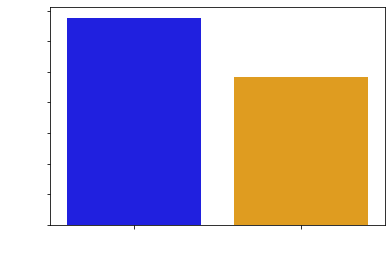

In [41]:
dc_marvel_count = df[df['dc/marvel'].isin(['DC', 'Marvel'])].groupby('dc/marvel')['ID'].count().reset_index()

sns.barplot(data=dc_marvel_count, x='dc/marvel', y='ID', palette=['blue', 'orange'])

plt.ylabel('Número de películas únicas', fontsize=12, color='white')  
plt.xlabel('Universo', fontsize=12, color='white')  
plt.xticks(color='white')  
plt.yticks(color='white') 
plt.xticks(rotation=0)

plt.show()

In [50]:
dc_marvel_count

,dc/marvel,ID
0,DC,677
1,Marvel,483


## IBDM  Ratings

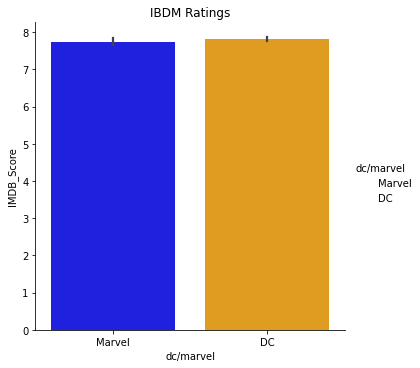

In [42]:
sns.catplot(
    data=df,
    kind='bar',
    x=df['dc/marvel'],
    y=df['IMDB_Score'],
    palette={'DC': 'orange', 'Marvel': 'blue'},
    
)

plt.title('IBDM Ratings')
plt.show()

## Number of Movies Produced by DC and Marvel Each Year

In [43]:
# Group by year for both DC and Marvel
dc_movie_count = df[df['dc/marvel'] == 'DC'].groupby('StartYear')['ID'].count().reset_index()
dc_movie_count.columns = ['Year', 'DC_MovieCount']

marvel_movie_count = df[df['dc/marvel'] == 'Marvel'].groupby('StartYear')['ID'].count().reset_index()
marvel_movie_count.columns = ['Year', 'Marvel_MovieCount']

# Merge the two DataFrames
movie_count_per_year = pd.merge(dc_movie_count, marvel_movie_count, on='Year', how='outer').fillna(0)
movie_count_per_year

,Year,DC_MovieCount,Marvel_MovieCount
0,1952,1.0,0.0
1,1979,1.0,0.0
2,1980,1.0,0.0
3,1982,1.0,0.0
4,1984,1.0,0.0
5,1985,1.0,1.0
6,1987,1.0,0.0
7,1988,1.0,0.0
8,1990,1.0,0.0
9,1991,1.0,0.0


In [44]:
html_content = movie_count_per_year.to_html(classes='table table-striped table-hover', index=False)

html_full = f"""

<body>
    <div class="container">
        <h2 class="my-4">Tabla de Películas DC y Marvel</h2>
        {html_content}
    </div>
</body>
</html>
"""

# Guardar el archivo HTML
with open('tabla_peliculas_bootstrap.html', 'w') as file:
    file.write(html_full)

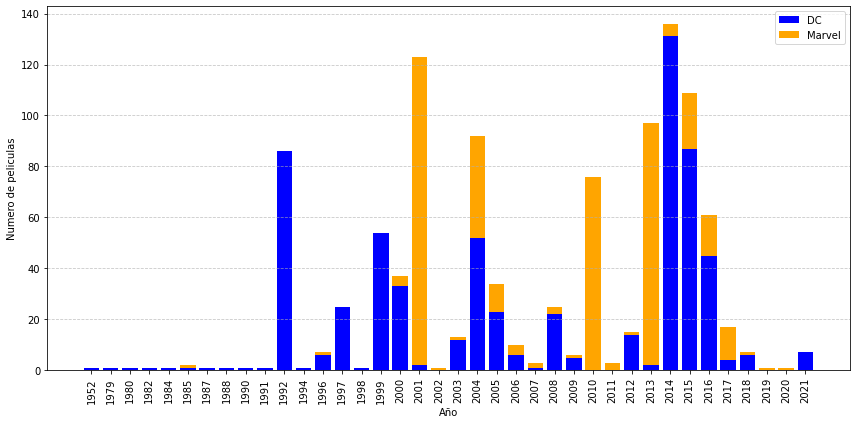

In [45]:
# Plotting stacked bar graph
plt.figure(figsize=(12, 6))

# Create a stacked bar plot
plt.bar(movie_count_per_year['Year'], movie_count_per_year['DC_MovieCount'], 
        color='blue', label='DC')
plt.bar(movie_count_per_year['Year'], movie_count_per_year['Marvel_MovieCount'], 
        bottom=movie_count_per_year['DC_MovieCount'], 
        color='orange', label='Marvel')

plt.xlabel('Año')
plt.ylabel('Numero de peliculas')
plt.xticks(rotation=90)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  
plt.show()


In [46]:
df_unique = df.drop_duplicates(subset='Movie')
df_unique['Genres_List'] = df_unique['Genre'].str.split(',')
df_exploded = df_unique.explode('Genres_List')

df_exploded_clean = df_exploded.dropna(subset=['Genres_List'])

df_exploded_clean = df_exploded_clean[df_exploded_clean['Genres_List'].str.strip() != '']

fig = px.treemap(
    df_exploded_clean, 
    path=['dc/marvel', 'Genres_List', 'Movie'],
    title='Marvel and DC film genres',
    hover_data=['IMDB_Score'], 
    color='IMDB_Score', 
    color_continuous_scale='ylorbr'
)

fig.show()

import json

# Suponiendo que 'fig' es tu gráfico
json_data = fig.to_json()
with open('plot_json.txt', 'w') as f:
    f.write(json.dumps(json_data))  # Escapa las comillas


In [47]:
df.columns

Index(['ID', 'Movie', 'Genre', 'IMDB_Score', 'RunTime(Min)', 'StartYear',
       'EndYear', 'dc/marvel'],
      dtype='object')

## Runtime vs. IMDb Score

In [48]:
# Create a scatter plot for Runtime vs. IMDb Score
fig = px.scatter(
    df,
    x='RunTime(Min)',  # Runtime in minutes
    y='IMDB_Score',    # IMDb Score
    color='dc/marvel', # Color points by DC or Marvel
    title='Runtime vs. IMDb Score',
    labels={'RunTime(Min)': 'Runtime (Minutes)', 'IMDB_Score': 'IMDb Score'},
    hover_data=['Movie'],  # Show the movie title on hover
)


fig.show()


## Distribution of IMDb Scores

In [49]:
df_unique['IMDB_Score'] = pd.to_numeric(df_unique['IMDB_Score'], errors='coerce')
df_unique['RunTime(Min)'] = pd.to_numeric(df_unique['RunTime(Min)'], errors='coerce')

# Drop rows with NaN values in 'IMDB_Score' or 'RunTime(Min)'
df_unique_cleaned = df_unique.dropna(subset=['IMDB_Score', 'RunTime(Min)'])

# size
plt.figure(figsize=(12, 7))
# Create the scatter plot
fig = px.scatter(
    df_unique_cleaned,
    x='StartYear',
    y='IMDB_Score',
    size='RunTime(Min)', 
    size_max=40,
    color='dc/marvel',
    hover_name='Movie',
    title='Duration and IMDb Rating for Marvel and DC Films'
)

# Show the plot
fig.show()

<Figure size 864x504 with 0 Axes>

## Inspiration 🧑‍💻 [Link](https://www.kaggle.com/code/timurkhabirovich/marvel-vs-dc-networked)